importing libraries

In [1]:
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
from numba import njit, prange
import image_processing
import unittest

c:\Users\ellab\Documents\stfc\image_processing\image_processing.py:450: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'damaged_pixel_masks' of function 'estimate_damaged_pixels_in_bright_areas'.

For more information visit https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "image_processing.py", line 386:
@njit(parallel=True)
def estimate_damaged_pixels_in_bright_areas(frames, damaged_pixel_masks, brightness_threshold=170):
^

  estimate = estimate_damaged_pixels_in_bright_areas(frames,
c:\Users\ellab\Documents\stfc\image_processing\image_processing.py:450: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'frames' of function '__numba_parfor_gufunc_0x1c00306fb20'.

For more information visit https://numba.readthedocs.io/en/stable/referen

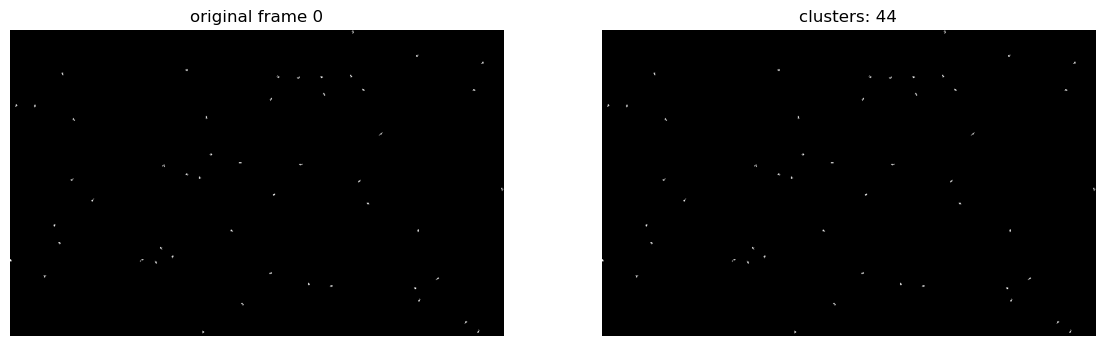

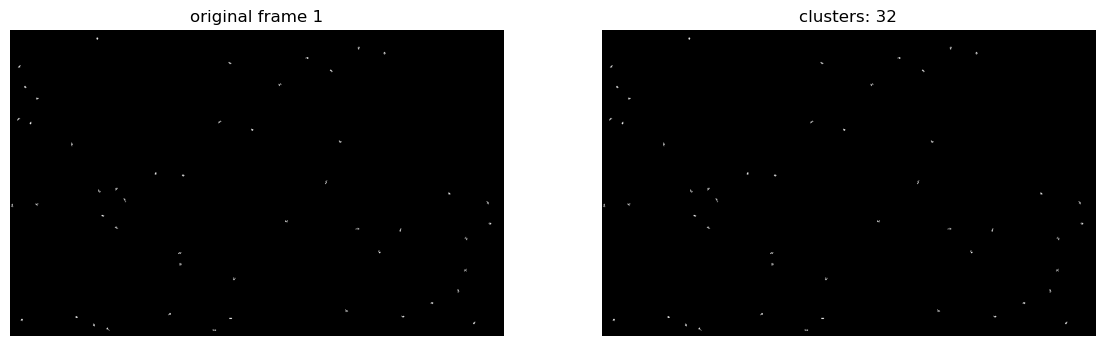

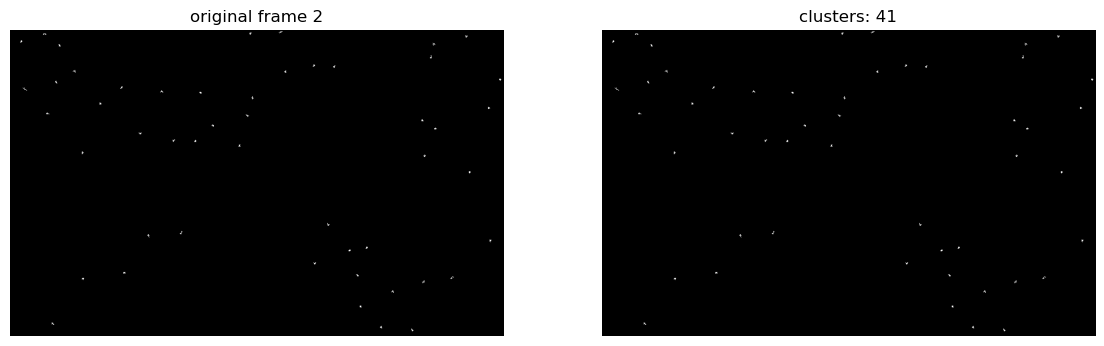

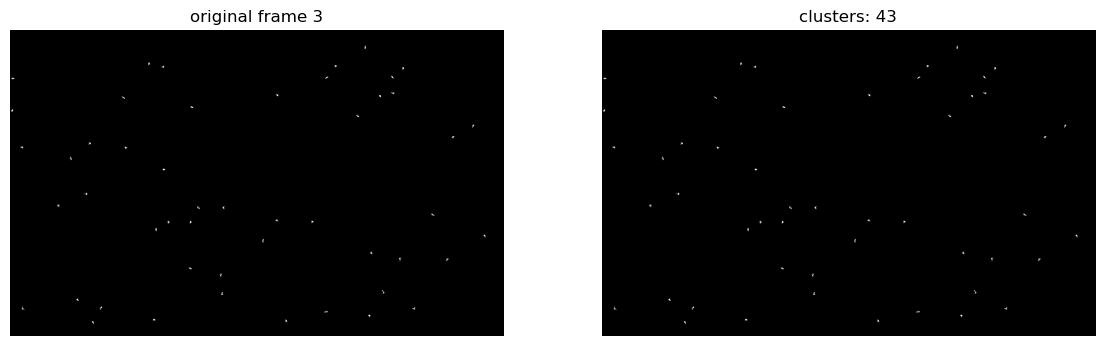

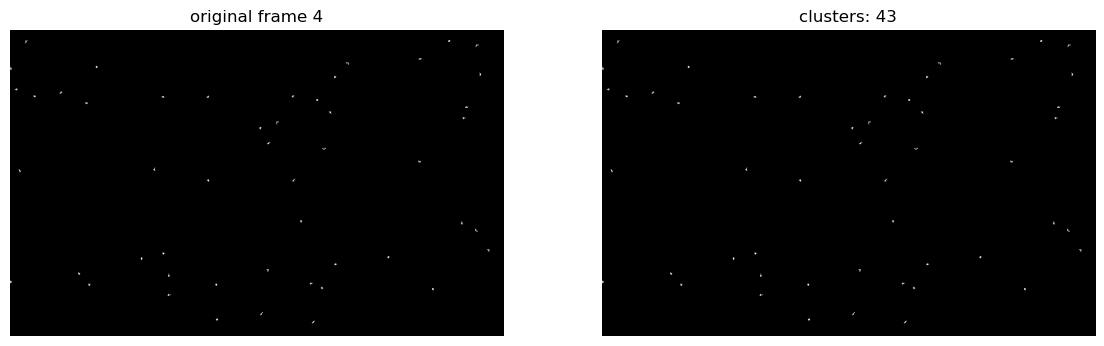

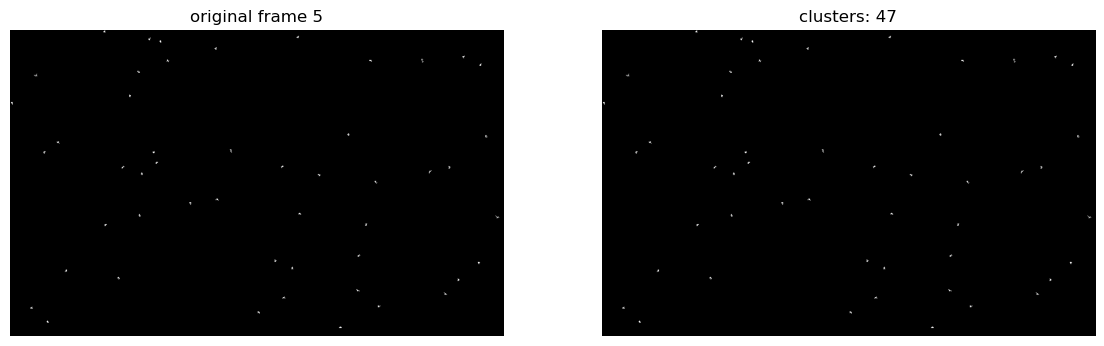

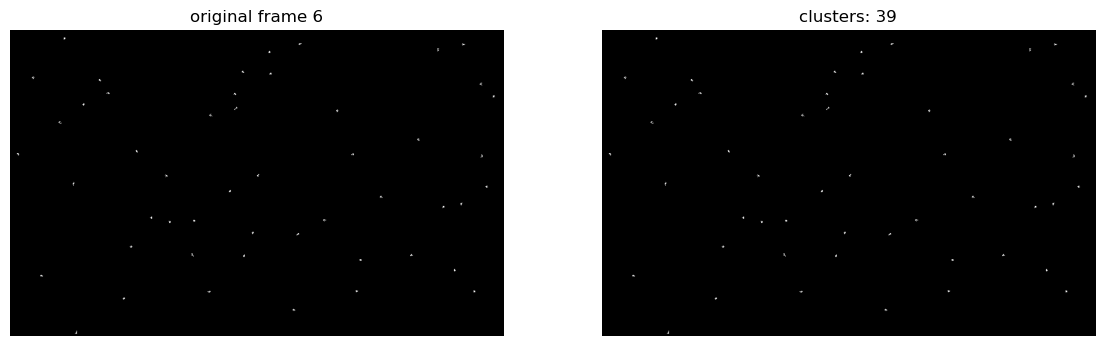

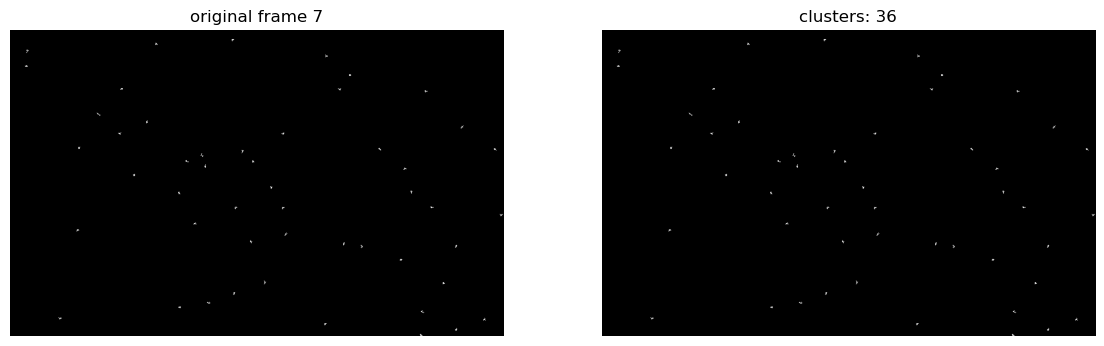

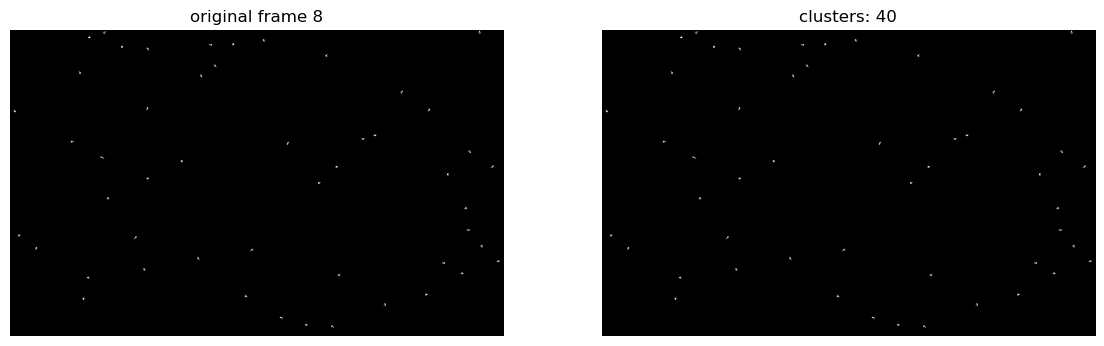

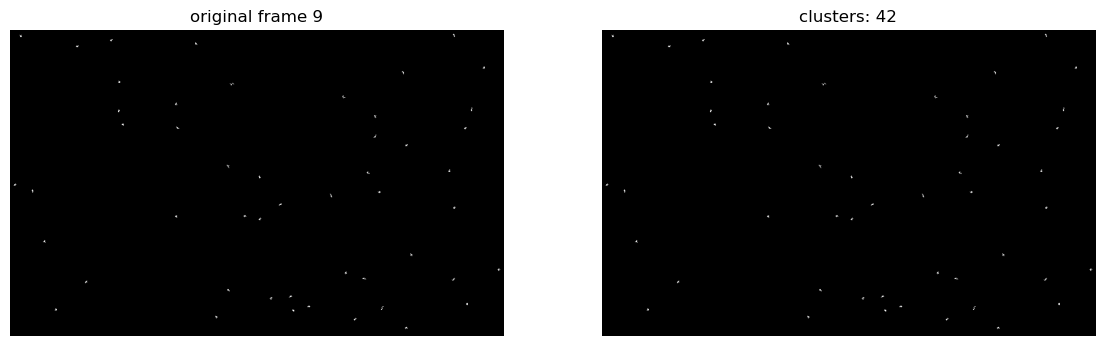

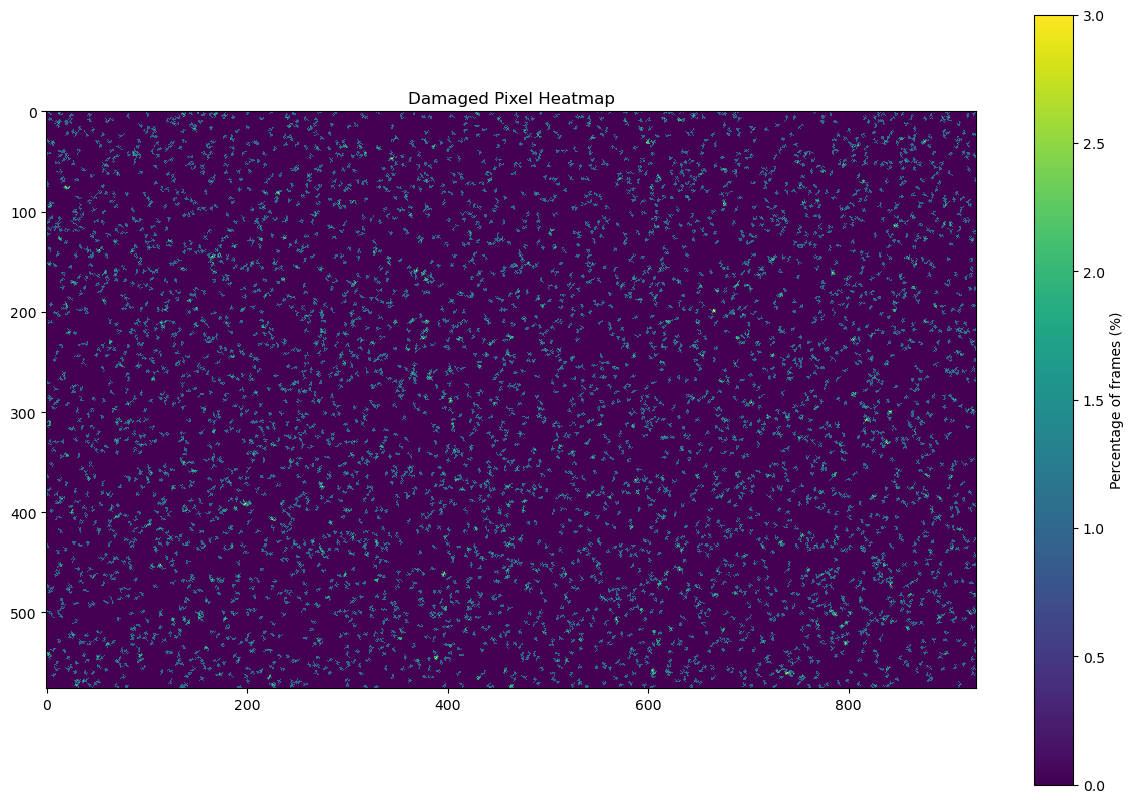

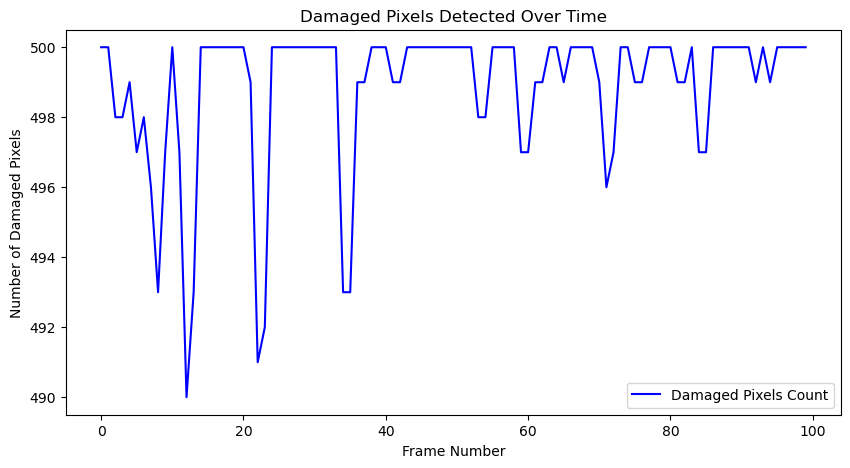

In [2]:
test, _ = image_processing.create_clustered_test_video()
test_pixels = image_processing.detect_damaged_pixels(test, plot = True, consecutive_threshold = 2, brightness_threshold = 140, flow_threshold = 1, number_of_plots=10)

In [3]:
class TestTemporalDamageFiltering(unittest.TestCase):
    def test_long_lasting_damaged_pixels(self):
    
        num_frames = 20
        width, height = 100, 80
        damaged_pixel_count = 30
        duration = 10
        consecutive_threshold = 2

        frames, _ = image_processing.create_temporal_test_video(
            num_frames,
            width,
            height,
            damaged_pixel_count = damaged_pixel_count,
            duration = duration,
            background_intensity = 0
        )

        counts = image_processing.detect_damaged_pixels(
            frames,
            plot = False,
            consecutive_threshold = consecutive_threshold
        )

        self.assertTrue(
            all(c == 0 for c in counts),
            f"expected zero counts when duration > {consecutive_threshold}, got {counts}"
        )

if __name__ == "__main__":
    unittest.main(argv = [""], exit = False)

F
FAIL: test_long_lasting_damaged_pixels (__main__.TestTemporalDamageFiltering)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "C:\Users\ellab\AppData\Local\Temp\ipykernel_27516\1010040482.py", line 25, in test_long_lasting_damaged_pixels
    self.assertTrue(
AssertionError: False is not true : expected zero counts when duration > 2, got ([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

----------------------------------------------------------------------
Ran 1 test in 0.050s

FAILED (failures=1)


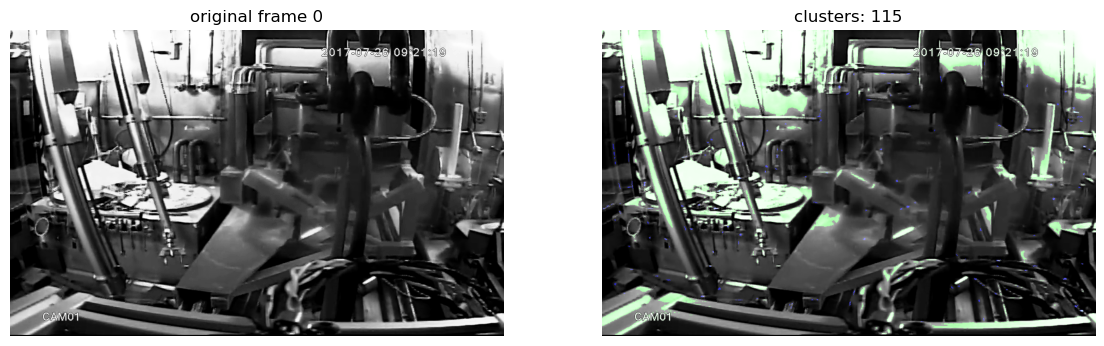

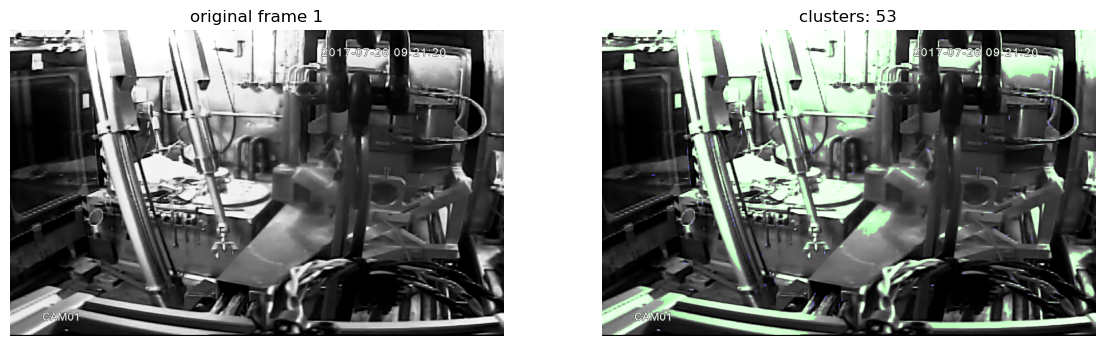

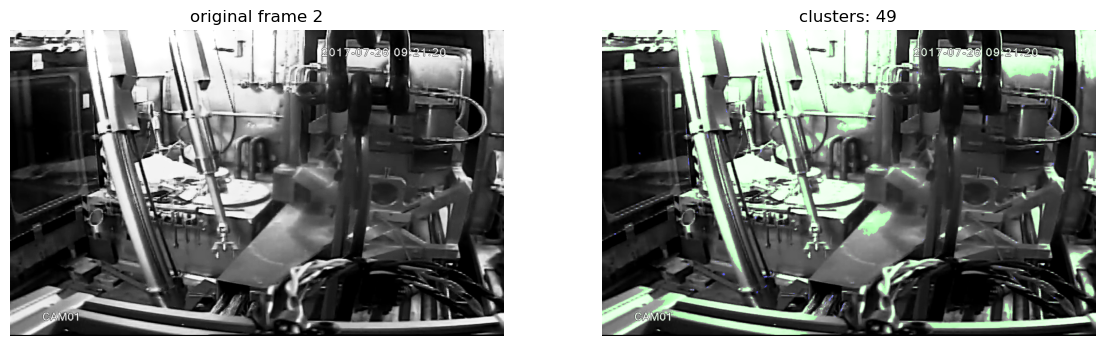

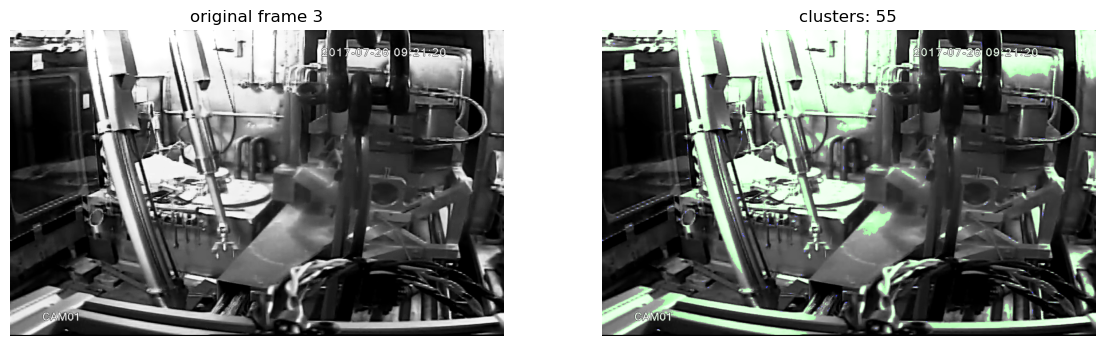

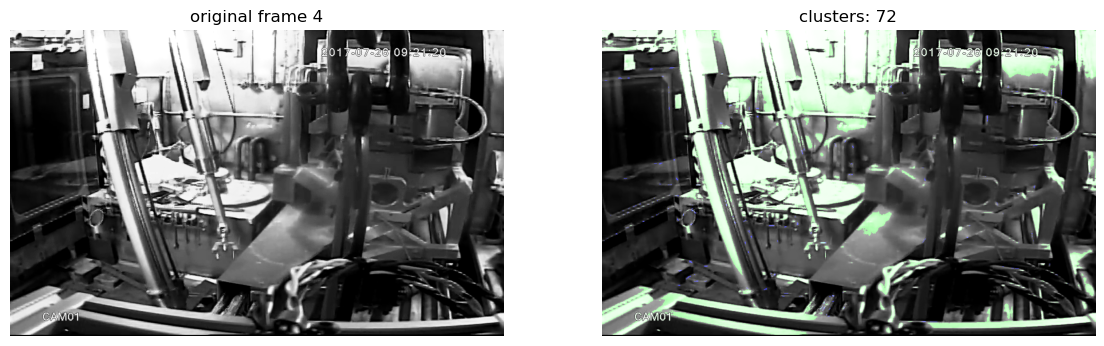

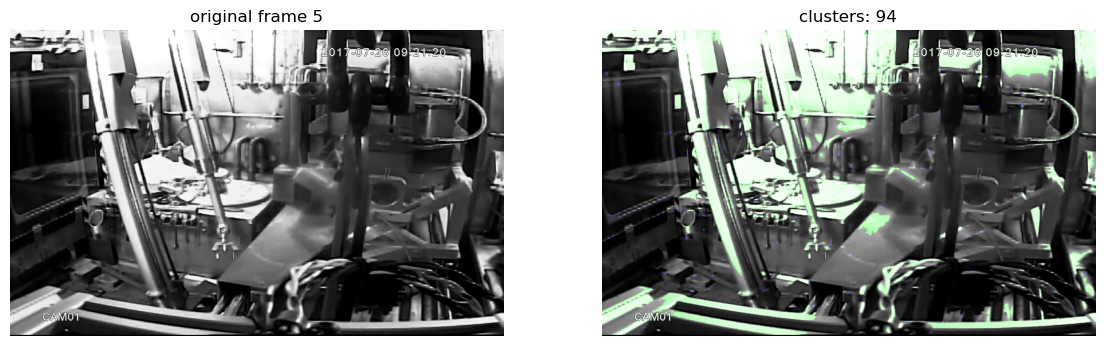

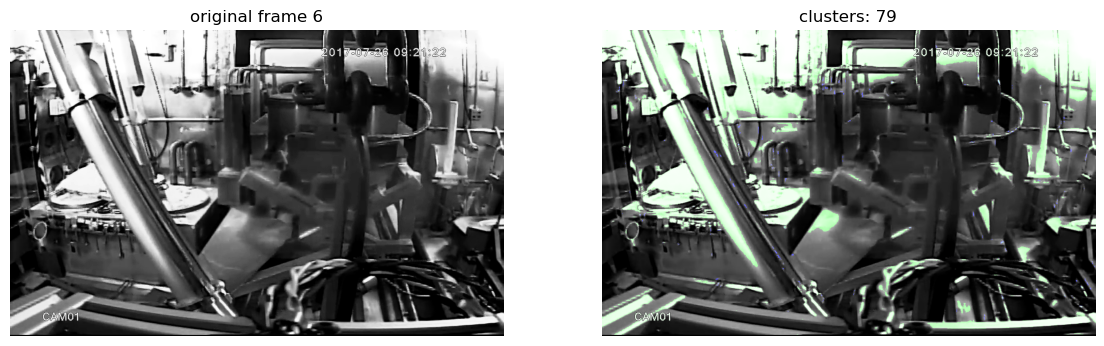

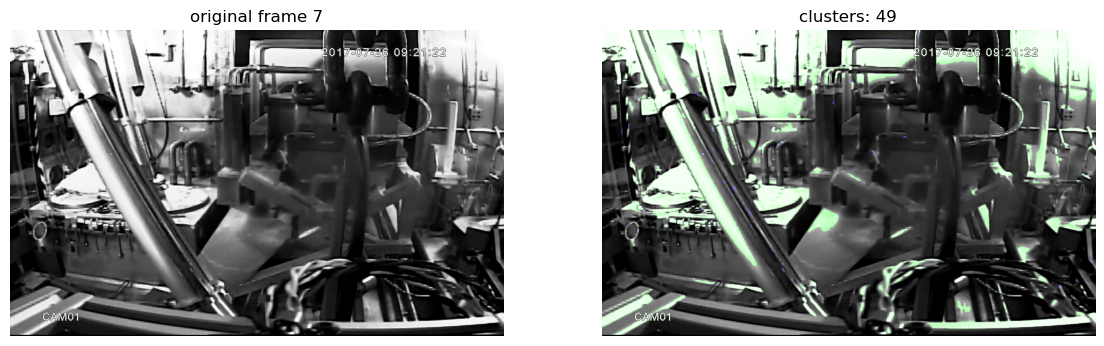

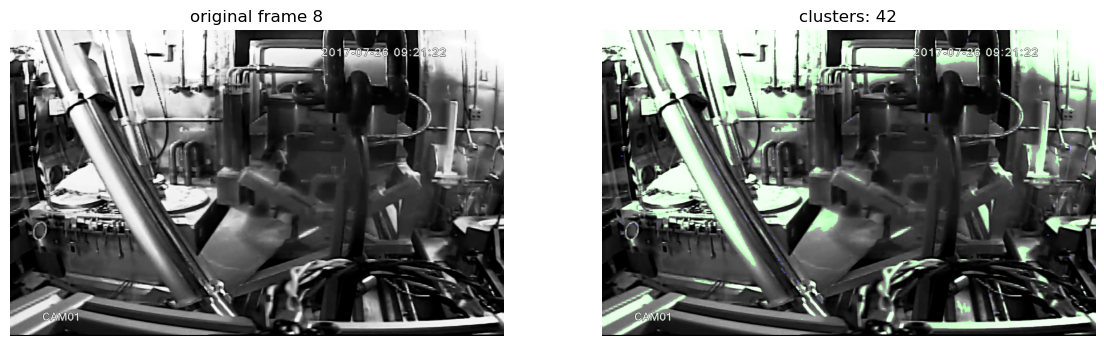

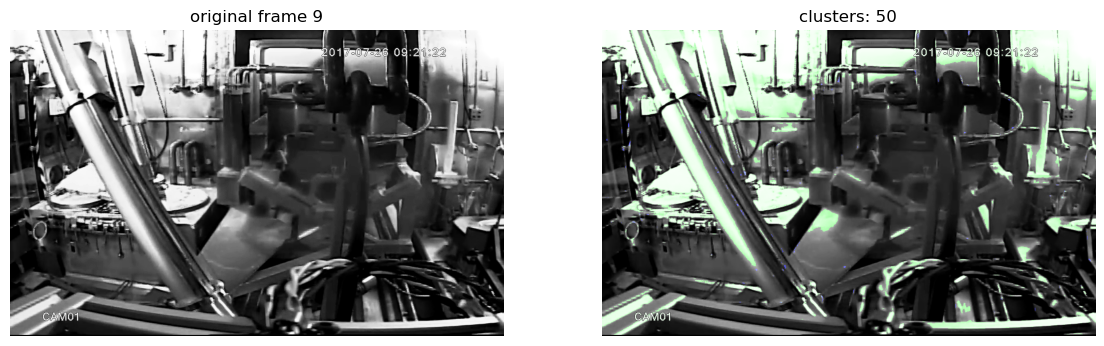

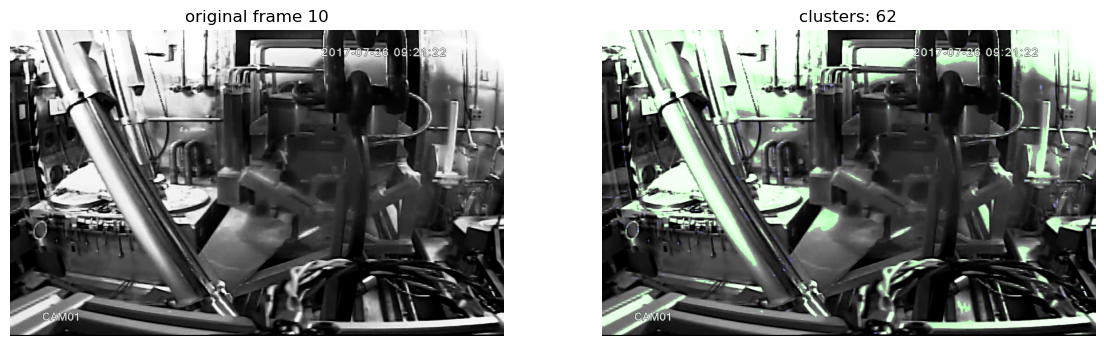

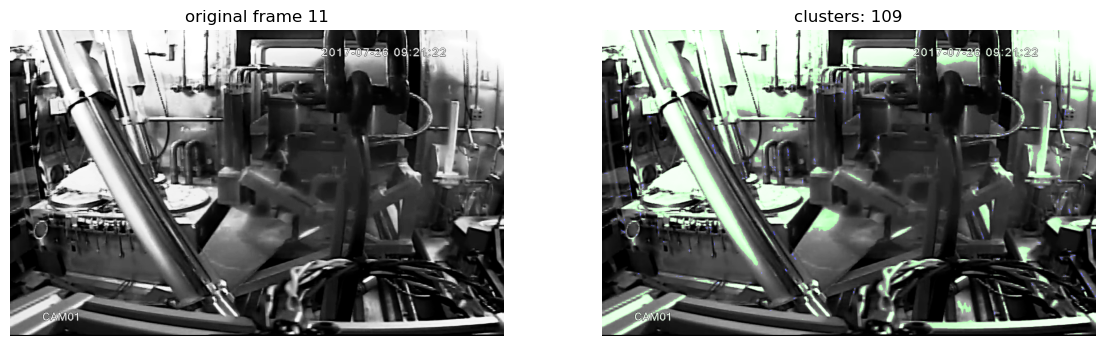

IndexError: list index out of range

In [4]:
frame_threshold_low = 86200
frame_threshold_high = 86300

video_filename = "11_01_H_170726081325.avi"
frames = image_processing.load_video_frames(video_filename, frames_start = frame_threshold_low, frames_end = frame_threshold_high)
damaged_pixels = image_processing.detect_damaged_pixels(frames, plot = True, consecutive_threshold = 2, brightness_threshold = 150, flow_threshold = 1.0, number_of_plots=20)
     